This notebook contains all your results of the research done for your thesis on Oxygenic Photosynthesis for TRAPPIST-1 e.

In [1]:
import numpy as np
import pandas as pd
from scipy.constants import h,k,c,Wien,sigma, Avogadro
from astroquery.vizier import Vizier

%matplotlib inline
import matplotlib.pyplot as plt

# change plotting defaults
plt.rc('axes', labelsize=18)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (14, 10)

In [2]:
Avogadro #Avogadro's constant in mol-1

6.02214076e+23

**Integral Codes**

In [3]:
def trap_rule_data_defintgral(x, f, a, b): #for definite integral from (a,b) in trapezoidal rule
    #check bounday limits, make an if statement to check endpoints
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x[i+1] - x[i] #for ever index there is a delta x in value
        sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

In [4]:
#integral from a to b points in Trapezoid Rule for photons
def trap_rule_data_defintgral_photons(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x is in micron and f is per micron. Convert to meters
    e = (h*c)/(x*1e-6) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f/1e-6)/e #converting per micron to per meter then divide by photon energy
    x_m = (x*1e-6) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + ((y[i+1] + y[i])/2)*(delta_x) #sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum

In [5]:
au = 149597870700 #m
R_sol = 6.957e8
R_TRAP1 = 0.1192*R_sol

## Data

2000 ASTM data of the Sol-Earth insolation

In [6]:
cols=['Wavelength', 'Wavenumber', 'Solar Flux incident at top of atmosphere', 'Planetary Flux', 'Albedo']
sol_data = pd.read_csv('data/earth_quadrature_radiance_refl.flx', sep ='	', header=7, names=cols)
sol_data #wavelength units in um (microns), flux at TOA units in w/m2/um

,Wavelength,Wavenumber,Solar Flux incident at top of atmosphere,Planetary Flux,Albedo
0,0.100180,99820.320,0.807223,0.000000,0.000000
1,0.100181,99819.330,0.807203,0.000000,0.000000
2,0.100182,99818.330,0.807183,0.000000,0.000000
3,0.100183,99817.330,0.807163,0.000000,0.000000
4,0.100184,99816.340,0.807143,0.000000,0.000000
...,...,...,...,...,...
97816,4.990020,2004.000,3.575930,3.115866,0.871344
97817,4.992510,2003.000,3.573370,3.124458,0.874373
97818,4.995010,2001.998,3.594160,3.155102,0.877841
97819,4.997500,2001.001,3.589550,3.169270,0.882916


For the data on TRAPPIST-1, you need steller spectra data of the TOA for TRAPPIST-1 or at least a star similar in the same spectral class M9V (check Gillion paper). Look for data to download and repeat the intregal code for the full wavelength and PAR range in energy and photons. 

Data used is a model of the TRAPPIST-1 spectrum where the flux is given at 1 AU. (Lincowski et al., 2018) http://vpl.astro.washington.edu/spectra/stellar/trappist1.htm

The visible-NIR portion is a standard 2500K M dwarf from the PHOENIX 2.0 spectral library
(http://phoenix.astro.physik.uni-goettingen.de/)
with UV < 0.3112 um from the Meadows et al. 2018 Proxima Centauri spectrum
with UV scaled such that Lyman alpha is 1/6 of Proxima, according to Bourrier et al 2017. It includes a 3000 K fit blackbody extension from 5.5 to 200 microns
The bolometric flux has been scaled to the luminosity of TRAPPIST-1 (0.000525 L_sun)

Bourrier et al 2017 https://www.aanda.org/articles/aa/full_html/2017/03/aa30238-16/aa30238-16.html

France et al 2013 https://iopscience.iop.org/article/10.1088/0004-637X/763/2/149

Incident Flux https://www.sciencedirect.com/topics/earth-and-planetary-sciences/flux-density#:~:text=This%20so%2Dcalled%20inverse%20square,c%20o%20n%20s%20t%20.

In [7]:
cols2=['blank','wavelength', 'flux']
#TRAP_data = np.genfromtxt('trappist1_sed.txt', delimiter='	') 
TRAP_data1 = pd.read_csv('data/trappist1_sed_original.txt', sep ='	', usecols=(1, 2), header=19, names=cols2)
TRAP_data1 #wavelength in um and flux at 1 AU is W/m2/um

,wavelength,flux
0,0.120011,6.162980e-04
1,0.120012,6.576850e-04
2,0.120013,7.303310e-04
3,0.120015,6.130150e-04
4,0.120016,3.218180e-04
...,...,...
83272,185.185000,1.712030e-08
83273,188.679000,1.589080e-08
83274,192.308000,1.472850e-08
83275,196.078000,1.363110e-08


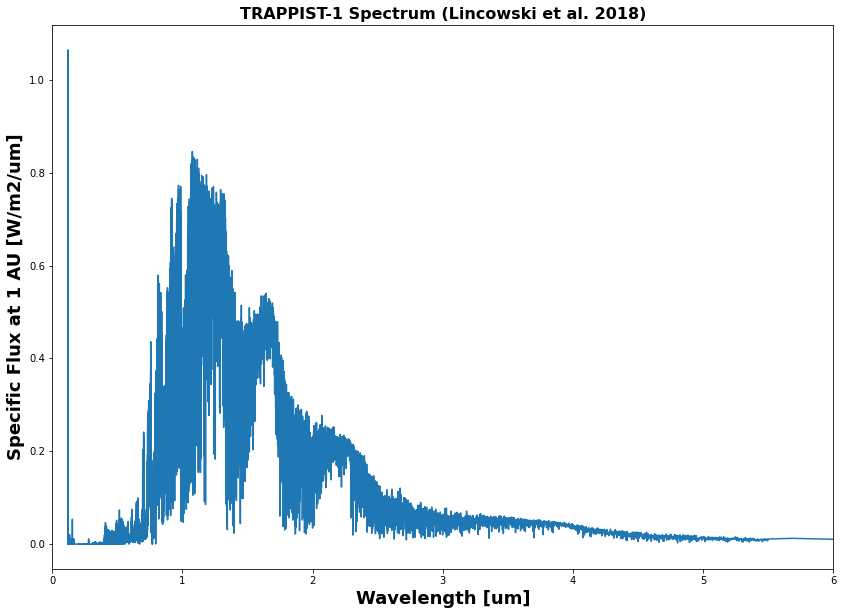

In [8]:
plt.plot(TRAP_data1['wavelength'], TRAP_data1['flux'])
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at 1 AU [W/m2/um]')
plt.xlim(0, 6)
plt.title('TRAPPIST-1 Spectrum (Lincowski et al. 2018)');

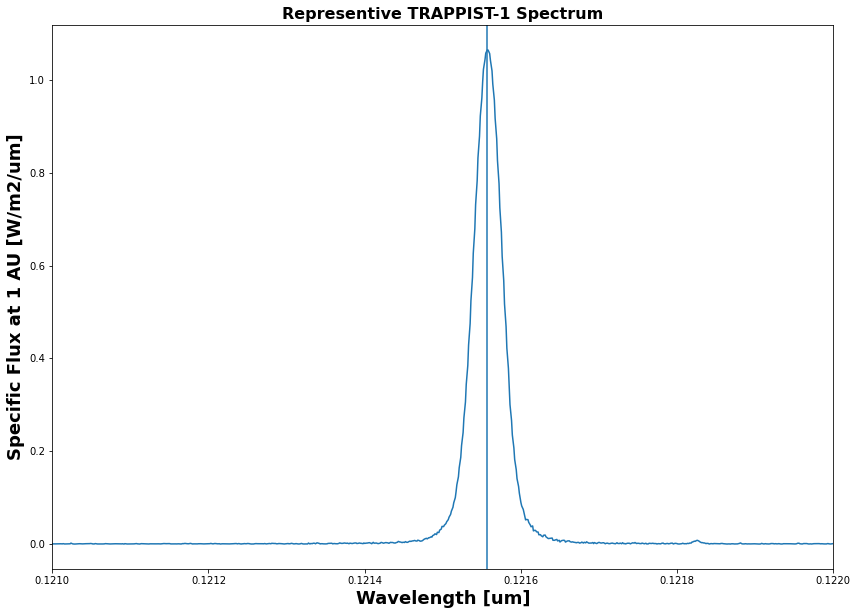

In [9]:
plt.plot(TRAP_data1['wavelength'], TRAP_data1['flux'])
plt.title('Representive TRAPPIST-1 Spectrum')
plt.xlabel('Wavelength [um]')
plt.ylabel('Specific Flux at 1 AU [W/m2/um]')
plt.xlim(0.121, 0.122)
plt.axvline(0.121557); #

In [10]:
TRAP_data1['wavelength'][np.argmax(TRAP_data1['flux'])] #wavelength of maximum flux in spectra

0.121557

In [11]:
TRAP_data1['flux'][np.argmax(TRAP_data1['flux'])] #maximum flux in spectra

1.06485

There is a very strong emission line at 0.121558 microns. This is 1215.58 Angstroms and the Lynmann Alpha line. This is where hydrogen goes from level 2 (first excited state) to level 1 (ground state). When you decrease a level, you are emitting.

Considering how large the Lymann Alpha is compared to the main light emission in the infrared of TRAPPIST-1, this is a sign that the star is emitting high amounts of ultraviolet light in that line. All the UV light is concentrated and focused in the area of the line, the rest are flat in the UV region. This could be hazarderous to atmosphere.

Chromosphere is optically thin above the photosphere that produces emission lines, which seems indicate the highest flux is in the chromosphere lymann alpha line. (photosphere -> chromosphere -> corona)


Considering that TRAPPIST-1 model spectrum has a flux at 1 AU, the **flux for the stellar insolation needs to be adjusted to the distance that TRAPPIST- e is at. Since $S_{d} \propto \frac{1}{r^{2}}$, then we take the original flux / $d^{2}$ in AU units**.

From Agol et. 2021, the distance of TRAPPIST-1 e is 2.925e-2 $\pm$ 0.025 AU. Whereas Gillon et al. (2017) states the semimajor axis is 0.02817 AU.

While Linckowski et. al. published this in 2018, in this version will see how it matches with the data from the Time Transit Varinging results of Agol et. al. 2021 of 0.02925 AU.

Note: to fix the speed of your blackbody function graph. Just have it be full wavelength TRAPPIST-1 data from 0.120 microns to 200 microns.

In [12]:
#Agol et al. 2021 distance. S = 1/r^2
flux_TRAP1e1 = (TRAP_data1['flux'])/((0.02925)**2)
flux_TRAP1e1

0        0.720342
1        0.768716
2        0.853627
3        0.716505
4        0.376148
           ...   
83272    0.000020
83273    0.000019
83274    0.000017
83275    0.000016
83276    0.000015
Name: flux, Length: 83277, dtype: float64

In [13]:
(0.02925)**2

0.0008555625000000001

In [14]:
(1)/((0.02925)**2)

1168.8216816421943

**Energy Flux**

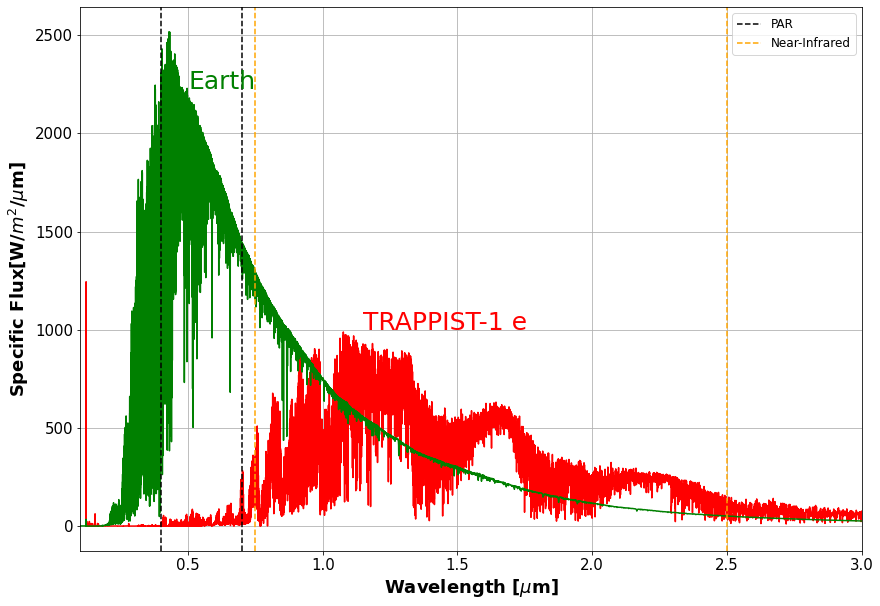

In [15]:
#using Agol et al. 2021 distance
plt.plot(TRAP_data1['wavelength'], flux_TRAP1e1, color='red')
#Earth data
plt.plot(sol_data['Wavelength'],sol_data['Solar Flux incident at top of atmosphere'], 
         color='green')
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'Specific Flux[W/$m^{2}$/$\mu$m]')
plt.xlim(0.1, 3.0) #UV starts at 1.0 micron
#plt.title('Representive TRAPPIST-1 Spectrum vs Solar Flux Spectrum')
plt.text(0.5, 2225, 'Earth', c='green', fontsize=25)
plt.text(1.15, 1000, 'TRAPPIST-1 e', c='red', fontsize=25)
plt.axvline(0.4, c='black', ls='--', label='PAR')
plt.axvline(0.7, c='black', ls='--')
plt.axvline(0.75, c='orange', ls='--', label='Near-Infrared')
plt.axvline(2.5, c='orange', ls='--')
plt.legend(fontsize='large')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid();

In [16]:
L_sol = 3.828e26 #W ,solar luminosity
L_TRAPPIST1 = 0.000525*L_sol
d_norm_S_M = np.sqrt(L_TRAPPIST1/(4*np.pi*1361))
au = 149597870700 #m, 1 AU from https://www.iau.org/static/resolutions/IAU2012_English.pdf
d_norm_S = d_norm_S_M/au
d_norm_S #distance for TRAPPIST-1 to be normalized to 1 S_Earth

0.02291427968163235

## Calculations

'a' for Earth.

In [17]:
#test in full wavelength for photons of Solar Flux
n = []
n = sol_data['Solar Flux incident at top of atmosphere'] #W/m2/um
m = []
m = sol_data['Wavelength'] #um
o, p = sol_data['Wavelength'][0], sol_data['Wavelength'][97820]
trap_rule_data_defintgral(m, n, o, p)

1366.8020639805866

In [18]:
a = trap_rule_data_defintgral(m, n, o, p)
np.absolute(a - (1361))/(1361)*100

0.4263088890952668

In [19]:
#2000 ASTM mean irradence for Earth is 1366.1 W/m^2
np.absolute(a - (1366.1))/(1366.1)*100

0.051391843978235284

In [20]:
d, e = 0.4, 0.7 #microns

In [21]:
#Trap rule for energy in par
trap_rule_data_defintgral(m, n, d, e)

530.8008648229996

In [22]:
a_PAR = trap_rule_data_defintgral(m, n, d, e)
a_PAR/a

0.38835240215919

In [23]:
#Photons of Earth
a_photons = trap_rule_data_defintgral_photons(m, n, o, p, h, c)
a_photons

6.318968046213717e+21

In [24]:
sol_data['Wavelength'][97820]

5.0

In [25]:
a_photons_PAR = trap_rule_data_defintgral_photons(m, n, d, e, h, c)
a_photons_PAR

1.4558190736255224e+21

In [26]:
(a_photons_PAR/a_photons)*100

23.03887379993699

 'b' for TRAPPIST-1 e.

In [27]:
#TRAPPIST-1 e in full wavelength, energy
g = []
g = TRAP_data1['wavelength']
y = []
y = flux_TRAP1e1
i, j = TRAP_data1['wavelength'][0], TRAP_data1['wavelength'][83276]
trap_rule_data_defintgral(g, y, i, j) #W/m^2

835.2382299825273

In [28]:
j_a = 5.0

In [29]:
trap_rule_data_defintgral(g, y, i, j_a) #from 0.12 to 5 microns as with the Solar Flux full length data

795.4401282616826

In [30]:
b = trap_rule_data_defintgral(g, y, i, j)
np.absolute(b - (0.646*1361))/(0.646*1361)*100

5.000849632221883

In [31]:
np.absolute(b - (0.646*a))/(0.646*a)*100

5.404120276202298

In [32]:
#Trap rule for energy in par
trap_rule_data_defintgral(g, y, d, e)

4.378540350354687

In [33]:
b_PAR = trap_rule_data_defintgral(g, y, d, e)
b_PAR/b

0.005242265252209879

In [34]:
b_5m = trap_rule_data_defintgral(g, y, i, j_a) #from 0.12 to 5 microns as with the Solar Flux full length data
b_PAR/b_5m

0.005504550493226111

In [35]:
#Trapezoid rule in photons
trap_rule_data_defintgral_photons(g, y, i, j, h, c) #photons m-2 s-1

8.57290550803499e+21

In [36]:
trap_rule_data_defintgral_photons(g, y, i, j_a, h, c)

6.951154081068901e+21

In [37]:
b_photon = trap_rule_data_defintgral_photons(g, y, i, j, h, c)

In [38]:
b_photon_5m = trap_rule_data_defintgral_photons(g, y, i, j_a, h, c) #from 0.12 to 5 microns
b_photon_5m

6.951154081068901e+21

In [39]:
#PAR range
b_photon_PAR = trap_rule_data_defintgral_photons(g, y, d, e, h, c)
b_photon_PAR

1.3235421301108281e+19

In [40]:
(b_photon_PAR/b_photon)*100

0.15438664626249912

In [41]:
(b_photon_PAR/b_photon_5m)*100

0.1904060987103458

*In the PAR range in photons*, the area of the amount of photons from the blackbody curve is **7.86 times higher** than the model spectra (based on the distance from Agol et. al. 2021). Only 0.15% of total photons are in the PAR region.

Comparisons 

In [42]:
#full from 0.1 to 200 microns for TRAPPIST-1 e
#full from 0.1 to 5 microns for Earth
b/a

0.6110893830157331

In [43]:
b_photon/a_photons

1.356693916686573

In [44]:
b_photon

8.57290550803499e+21

In [45]:
a_photons

6.318968046213717e+21

In [46]:
trap_rule_data_defintgral_photons(g, y, i, j_a, h, c)

6.951154081068901e+21

In [47]:
trap_rule_data_defintgral_photons(g, y, i, j_a, h, c)/a_photons
#from 0.12 to 5 microns as with the Solar Flux full length data

1.1000457717512886

In [48]:
#energy
(b_PAR/a_PAR)*100

0.8248932208908044

In [49]:
b_PAR/a_PAR

0.008248932208908044

In [50]:
#photons
(b_photon_PAR/a_photons_PAR)*100

0.9091391602767807

From the coding above using the data sets from Trapezoid Rule:


| Instellation in Photons                                          | Full Wavelength        | PAR                        |
|------------------------------------------------------------------|------------------------|----------------------------|
| Sun-Earth                                                        | 6.318968046213717e+21  |  1.4558190736255224e+21    |
| TRAPPIST 1e (Gillion et al. 2017)                                | 9.242853803613324e+21  | 1.42697320063445e+19       |
|  TRAPPIST 1e (Agol et al. 2021)                                  | 8.57290550803499e+21   | 1.3235421301108281e+19     |


In [51]:
#fraction Trappist-1e blackbody over Solar Flux TOA blackbody
(1.040342063775682e+20)/(1.3714952462975705e+21)

0.07585458765417852

### PAR Extension - 750 nm

Chlorophyll *d* and *f* have wavelength peaks reaching 750 nm. We will do an extended version and see how many photons are included in comparison with Earth and TRAPPIST-1.

**Energy:**

Earth

In [52]:
e_ext = 0.750 #0.75 microns or 750 nm
#Earth
#Trap rule for energy in par
trap_rule_data_defintgral(m, n, d, e_ext)

597.7077835829986

In [53]:
#from 700-750 nm
trap_rule_data_defintgral(m, n, e, e_ext)

66.90691876000004

In [54]:
a_PAR_ext = trap_rule_data_defintgral(m, n, d, e_ext)
a_PAR_ext/a

0.43730383450129773

In [55]:
a_PAR/a_PAR_ext

0.8880608206924778

In [56]:
a_PAR_ext/a_PAR

1.1260490010360282

TRAPPIST-1 e

In [57]:
#Trap rule for energy in par
trap_rule_data_defintgral(g, y, d, e_ext)

9.804359233954667

In [58]:
#from 700-750 nm
trap_rule_data_defintgral(g, y, e, e_ext)

5.425818883599973

In [59]:
b_PAR_ext = trap_rule_data_defintgral(g, y, d, e_ext)
b_PAR_ext/b_5m #from 0.12 to 5 microns as with the Solar Flux full length data

0.012325703576686095

In [60]:
b_PAR/b_PAR_ext

0.4465911790737769

Comparsions: TRAPPIST-1 e/Earth

In [61]:
(b_PAR_ext/a_PAR_ext)*100

1.640326511256352

In [62]:
a_PAR_ext_7_75 = trap_rule_data_defintgral(m, n, e, e_ext)
b_PAR_ext_7_75 = trap_rule_data_defintgral(g, y, e, e_ext)
(b_PAR_ext_7_75/a_PAR_ext_7_75)*100

8.109503447711855

**Photons:**

Earth

In [63]:
#Earth
a_photons_PAR_ext = trap_rule_data_defintgral_photons(m, n, d, e_ext, h, c)
a_photons_PAR_ext

1.699854784002137e+21

In [64]:
#700-750nm
a_photons_PAR_7_75 = trap_rule_data_defintgral_photons(m, n, e, e_ext, h, c)
a_photons_PAR_7_75

2.4403571037661423e+20

In [65]:
a_photons_PAR_ext/a_photons

0.2690082892602501

In [66]:
a_photons_PAR/a_photons_PAR_ext

0.8564373188384615

TRAPPIST-1 e

In [67]:
b_photon_PAR_ext = trap_rule_data_defintgral_photons(g, y, d, e_ext, h, c)
b_photon_PAR_ext

3.327068423090348e+19

In [68]:
b_photon_PAR_7_75 = trap_rule_data_defintgral_photons(g, y, e, e_ext, h, c)
b_photon_PAR_7_75

2.003526292979515e+19

In [69]:
b_photon_PAR_ext/b_photon_5m

0.004786354012999715

In [70]:
b_photon_PAR/b_photon_5m

0.001904060987103458

In [71]:
b_photon_PAR/b_photon_PAR_ext

0.39781031280428425

Comparsions: TRAPPIST-1 e/Earth

In [72]:
#photons
(b_photon_PAR_ext/a_photons_PAR_ext)*100

1.9572662643905971

In [73]:
(b_photon_PAR_7_75/a_photons_PAR_7_75)*100

8.209971769654215

Based on the ratio comparisons in PAR region, when using the model spectrum data of both TRAPPIST-1 e over the solar flux TOA (Sun-Earth) the ratio is 0.009091 (0.9%). (**Most important value**) And then using the comparison of both of their blackbody function models, their ratio is 0.07585 (7.6%). The blackbody number is shown to be a very inaccurate number as proven in the graph where the spectra is far smaller to the blackbody than predicted in PAR region. 

We can *almost* draw conclusions on TRAPPIST-1 e at the TOA in PAR region in number of photons. But we don't know what the atmosphere is like. We can make assumations such as an Earth-like atmosphere but consider that Earth's atmosphere has changed over time.


In [74]:
#Converting photons to millimols
def photons_to_mmol(x, A):
    y = x*(1/A)*(1000) #(1mol/Av)*(1000 mmol/mol)
    return y #mmol*s^{-1}*m^{-2}

def photons_to_mmol_micron(x, A):
    y = x*(1/A)*(1000)*((1e-6)**2) #(1mol/Av)*(1000 mmol/mol)*(1e-6m/micron)^2
    return y #mmol*s^{-1}*micron^{-2}

def photons_to_mmol_A(x, A):
    y = x*(1/A)*(1000)*((1e-10)**2) #(1mol/Av)*(1000 mmol/mol)*(1e-6m/micron)^2
    return y #mmol*s^{-1}*Angstrom^{-2}

def photons_to_micromol(x, A):
    y = x*(1/A)*(1e6)
    return y #micromol m^[-2] s^[-1]

def photons_to_nmol(x, A): #nanomal
    y = x*(1/A)*(1e9)
    return y #nmol m^[-2] s^[-1]

#avogadro's number
A_v = 6.0221409e+23

In [75]:
Earth_solarflux_micromol = photons_to_micromol(a_photons_PAR , Avogadro) 
Earth_solarflux_micromol #micromol m-2 s-1

2417.4444464920184

In [76]:
TRAP1e_photon_flux_micromol = photons_to_micromol(b_photon_PAR, Avogadro) 
TRAP1e_photon_flux_micromol #micromol m-2 s-1

21.977934140995206

750nm Extenstion

In [77]:
Earth_solarflux_micromol_ext = photons_to_micromol(a_photons_PAR_ext, A_v) 
Earth_solarflux_micromol_ext #micromol m-2 s-1

2822.6752117376345

In [81]:
TRAP1e_photon_flux_micromol_ext = photons_to_micromol(b_photon_PAR_ext, A_v) 
TRAP1e_photon_flux_micromol_ext #micromol m-2 s-1

55.247269672656586

In [82]:
Earth_solarflux_micromol_ext - Earth_solarflux_micromol

405.2307652456161

In [83]:
TRAP1e_photon_flux_micromol_ext - TRAP1e_photon_flux_micromol

33.26933553166138

Calculate the number of moles of photons for every square meter per second in PAR range. (mol m-2 s-1)

In [84]:
a_photons_PAR/A_v 

0.0024174443902923665

In [85]:
b_photon_PAR/A_v

2.197793363006216e-05

In [86]:
a_photons_PAR_ext/A_v

0.0028226752117376346

In [87]:
b_photon_PAR_ext/A_v

5.524726967265658e-05

In [88]:
(a_photons_PAR/A_v)*(1e6)

2417.4443902923663

Test Run of Avogadro's number for micromols

In [89]:
def trap_rule_data_defintgral_micromoles(x, f, a, b, h, c): #for definite integral from (a,b) 
    # photon energy of E = hc/lambda
    #NOTE your input for x is in micron and f is per micron. Convert to meters
    e = (h*c)/(x*1e-6) #x converting microns to meters, e is photon energy 
    #check bounday limits, make an if statement to check endpoints
    #when finding the index, the units have to be the same with the x array units
    difference_array_a = np.absolute(x-a) #take a difference between your x point to the given begin endpoint
    index_a = difference_array_a.argmin() #search array for the lowest difference and indexes it
    #the lowest difference implies the closest (or exact) point to your given begin endpoint
    difference_array_b = np.absolute(x-b) #repeats steps for last endpoint
    index_b = difference_array_b.argmin()
    #converted to photons
    y = (f/1e-6)/(Avogadro*e) #converting per micron to per meter then divide by photon energy and Avogadro's constant
    x_m = (x*1e-6) #converting micron to meter
    # initial variable stores the sum untile iterated in array later
    sum=0
    # iterate through the array and add each element to the sum variable
    for i in range(index_a, index_b):
        delta_x = x_m[i+1] - x_m[i] #for ever index there is a delta x in value
        sum = sum + ((y[i+1] + y[i])/2)*(delta_x) #sum = sum + ((f[i+1]+f[i])/2)*(delta_x) #same as f[i-1] + f[i] 
    return sum*(1e6) #mols to micromols - > outpot is micromols m-2 s-1

In [90]:
a_photons_micromoles = trap_rule_data_defintgral_micromoles(m, n, o, p, h, c)
a_photons_micromoles 
#y = (f/1e-6)/(Avogadro*e) -> return sum*(1e6) where Avogadro is already defined and does not need input

10492.893304961106

In [91]:
a_photons_micromoles_PAR = trap_rule_data_defintgral_micromoles(m, n, d, e, h, c)
a_photons_micromoles_PAR

2417.444446492028

In [92]:
b_photon_5m_micromoles = trap_rule_data_defintgral_micromoles(g, y, i, j_a, h, c) #from 0.12 to 5 microns
b_photon_5m_micromoles

11542.66291355991

In [93]:
b_photon_PAR_micromoles = trap_rule_data_defintgral_micromoles(g, y, d, e, h, c)
b_photon_PAR_micromoles

21.977934140995156

In [94]:
a_photons_PAR_ext_micromoles = trap_rule_data_defintgral_micromoles(m, n, d, e_ext, h, c)
a_photons_PAR_ext_micromoles

2822.6752773579146

In [95]:
b_photon_PAR_ext_micromoles = trap_rule_data_defintgral_micromoles(g, y, d, e_ext, h, c)
b_photon_PAR_ext_micromoles

55.24727095702002

In [96]:
1361*4.57

6219.77

NOTE: THis is all at TOA on a global scale across the entire planet. Find out how much reach the surface based on your previous research and compare to papers on this matter. 

# Timescales

We can almost draw conclusions on TRAPPIST-1 e at the TOA in PAR region in number of photons. But we don't know what the atmosphere is like. We can make assumations such as an Earth-like atmosphere but consider that Earth's atmosphere has changed over time.


Origin of Oxygenic Photosynthesis (OP) and Great Oxidation Event (GOE):
* For Origin of OP, the range is from 3.5 Gya to 2.7 Gya but 3.0 Bya will be our best guess.
* For GOE, my range is 2.4 to 2.22 Gya, but the date point will use is 2.3 Gya. 
    * 2.4 is the most common in a lot of papers.
    * 2.22 from Poulten et al. 2021
    * 2.33 (~2.3) from Lou et al. 2016
    

How long did it took for the GOE to occur once oxygenic photosynthesis began? 
* Based on the papers my numbers. 

<br> Minimum:  OP_min - GOE_max = 2.7 - 2.4 = 0.3 Gya

<br> Maximum: OP_max - GOE_min = 3.5 - 2.22 = 1.28 Gya 

<br> Best guess: OP_guess - GOE_guess = 3.0 - 2.3 = 0.7 Gya

Make the assumption life on TRAPPIST-1 e is identical to Earth's life. Move the Earth to TRAPPIST-1 e orbit. 
* How long does it take on TRAPPIST-1 from the origin of oxygenic photosynthesis to GOE? 
* Take the ratio of amount of photons (Trap_1/Earth) and multiple it with your best guess on the time scale of OP to GOE. 
* Think about what this means. I need an estimate of the age of TRAPPIST-1. 
* This is what you will think about your thesis. 

In [97]:
(b_photon_PAR/a_photons_PAR)**(-1)
# inverse to find out many times longer would it take to for TRAPPIST-1 e to recieve photons in equvialent to Earth in PAR

109.99416191637344

In [98]:
#Timescale of OP to GOE based on Best Guess
((b_photon_PAR/a_photons_PAR)**(-1))*0.7 #Gya, billion years

76.9959133414614

This implies based the best estimate of OP occurring from 3.0 Gya to GOE at 2.33 Gya, there is a 0.7 Gya timescale for O2 on Earth. If we put Earth in the location of TRAPPIST-1 then based the photon flux ratio in the PAR of TRAPPIST-1 e over Earth, it would take ~77 Gy for an oxygentation period to occur from the origin of oxygenic photosynthetic organisms. 

This means it will take 77 billion years for TRAPPIST-1 e to reach a significant amount of oxygen to the starting point of the GOE. And there is to consider how it took for Earth to reach siginificant amount of O2 from GOE to Camberian Explosion.

More importanly, considering that age of TRAPPIST-1 is 7.6 ± 2.2 Gyr and the Universe is 13.9 Gyr, then TRAPPIST-1 e has not reached a GOE event yet. This implies based on Earth's conditions, that TRAPPIST-1 e possibly has oxygenic microorganisms for 7.6 Gyr but does not contain significant oxygen by biological means. This would put pressure for life on this exoplanet that only simple microbial life can exist, no eurkaryotes or mitochondria, likely just bacteria. 

In regards to infrared photons:
* Why doesn't life just adapt to infrared light? That's the next step.

Minimum and Maximum Values

In [99]:
#Minimun timescale range, 2.7 - 2.4 = 0.3 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*0.3 #Gya, billion years

32.99824857491203

In [100]:
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*1.28 #Gya, billion years

140.79252725295802

Including the photoinhibtion factor based on Dobbs et al. 1999 of cyanobacteria where on the surface the mean photosynthic photon flux on Earth is 800 µmol m-2 s-1 and on the surface of an air mass of 1.5 for TRAPPIST-1 e is 15.775 µmol m-2 s-1 for tidal lock and for a day-night cycle 7.273 $\mu$mol m$^{-2}$ s$^{-1}$. 

Based on the PI Curve vs the Linear Line Assumption, the ratios of $\frac{Linear Line}{PI curve}$ where the TRAPPIST-1 Surface PAR intersect. 
* For surface, the photoinhibition factor is 0.44647724173641573 at 15.775 $\mu$mol m$^{-2}$ s$^{-1}$
* For surface, the photoinhibition factor is 0.44259099367446125 at 7.273 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.27138740487640617 at 15.775 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2675769798472117 at 7.273 $\mu$mol m$^{-2}$ s$^{-1}$

Average

In [101]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Average Timescale
((b_photon_PAR/a_photons_PAR)**(-1))*0.7*(0.44647724173641573) #Gyr, billion years

34.37692301367178

In [102]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Average Timescale
((b_photon_PAR/a_photons_PAR)**(-1))*0.7*(0.44259099367446125) #Gyr, billion years

34.07769779467011

In [103]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Average Timescale
((b_photon_PAR/a_photons_PAR)**(-1))*0.7*(0.27138740487640617) #Gyr, billion years

20.895721107827868

In [104]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Average Timescale
((b_photon_PAR/a_photons_PAR)**(-1))*0.7*(0.2675769798472117) #Gyr, billion years

20.602333952485875

Minimum 

In [105]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimun timescale range, 2.7 - 2.4 = 0.3 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*0.3*(0.44647724173641573) #Gyr, billion years

14.732967005859335

In [109]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Minimun timescale range, 2.7 - 2.4 = 0.3 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*0.3*(0.44259099367446125) #Gyr, billion years

14.604727626287191

In [112]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimun timescale range, 2.7 - 2.4 = 0.3 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*0.3*(0.27138740487640617) #Gyr, billion years

8.955309046211944

In [113]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Minimun timescale range, 2.7 - 2.4 = 0.3 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*0.3*(0.2675769798472117) #Gyr, billion years

8.829571693922519

Maximum

In [114]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*1.28*(0.44647724173641573) #Gya, billion years

62.86065922499984

In [115]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*1.28*(0.44259099367446125) #Gya, billion years

62.313504538825356

In [116]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*1.28*(0.27138740487640617) #Gya, billion years

38.20931859717097

In [117]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR/a_photons_PAR)**(-1))*1.28*(0.2675769798472117) #Gya, billion years

37.672839227402754

## Considering PAR extension to 750 nm.

In [118]:
#OP to GOE based on Best Guess
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.7 #Bya, billion years

35.764168255255136

In [119]:
#Minimun timescale range, 2.7 - 2.4 = 0.3 Gya
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.3

15.32750068082363

In [120]:
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.28 

65.39733623818083

**With Photoinhibtion** 

For the surface at air mass 1.5, Earth’s surface recieves 1.24 x 1021 photons m-2 s-1, or 2066.42 μmol m-2 s-1, in PARext. As about 73% of photons reach the surface in PARext, for TRAPPIST-1e about 2.39 x 1019 photons m-2 s-1, or 40.45 μmol m-2 s-1, are received. Assuming this is the maximum PAR photon flux on the day side only, I can apply the same method to determine the average photon flux a day-night cycle where the Earth-analog TRAPPIST-1e obtains 18.65 μmol m-2 s-1. 

The ratios of $\frac{Linear Line}{PI curve}$ where the TRAPPIST-1 Surface Extended PAR intersect. 
* For surface, the photoinhibition factor is 0.45794773495679114  at 40.445 $\mu$mol m$^{-2}$ s$^{-1}$
* For surface, the photoinhibition factor is 0.4477975196269543 at 18.647 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2827535773413341 at 40.445 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2726865992277919 at 18.647 $\mu$mol m$^{-2}$ s$^{-1}$

Average

In [123]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#OP to GOE based on Best Guess
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.7*(0.45794773495679114) #Gyr, billion years

16.378119845107662

In [124]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#OP to GOE based on Best Guess
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.7*(0.4477975196269543) #Gyr, billion years

16.015105836224308

In [125]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#OP to GOE based on Best Guess
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.7*(0.2827535773413341) #Gyr, billion years

10.112446514810769

In [126]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#OP to GOE based on Best Guess
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.7*(0.2726865992277919) #Gyr, billion years

9.752409415736075

Minimum 

In [127]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.3*(0.45794773495679114)

7.0191942193318555

In [128]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.3*(0.4477975196269543)

6.8636167869532745

In [129]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.3*(0.2827535773413341)

4.333905649204615

In [130]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*0.3*(0.2726865992277919)

4.179604035315461

Maximum

In [131]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.28*(0.45794773495679114)

29.948562002482586

In [132]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.28*(0.4477975196269543)

29.28476495766731

In [133]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.28*(0.2827535773413341)

18.491330769939694

In [134]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Maximum timescale range, 3.5 - 2.22 = 1.28 Gya
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.28*(0.2726865992277919)

17.83297721734597

After the Great Oxidation Event, there is a large gap of how low it took for life on Earth to reach a threshold of 10% oxygen in the atmosphere as eukoryotes (complex, multicellular life) began to evolve. The grand diversification of macro-organisms first occurred in the Cambrian Explosion at approximately 540 million years ago. Here I will calculate how long it would take to reach a Cambrian Explosion after a GOE event based on the three time stamps I have chosen. As well as how much time has passed from origin of OP to Cambrian Explosion.

GOE to Cambrian Explosion
<br> Minimum: GOE_min - CE = 2.22 - 0.540  = 1.68 Gya

<br> Maximum: GOE_max - CE = 2.4 - 0.540 = 1.860 Gya

<br> Best guess: GOE_guess - CE = 2.3 - 0.540  = 1.76 Gya


OP to Cambrian Explosion

<br> Minimum:  OP_min - CE = 2.7 - 0.540 = 2.16 Gya

<br> Maximum: OP_max - CE = 3.5 - 0.540 = 2.96 Gya 

<br> Best guess: OP_guess - CE = 3.0 - 0.540 = 2.46 Gya

**Including the Photoinhition Ratio Parameters**

For PAR (400-700 nm)
* For surface, the photoinhibition factor is 0.44647724173641573 at 15.775 $\mu$mol m$^{-2}$ s$^{-1}$
* For surface, the photoinhibition factor is 0.44259099367446125 at 7.273 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.27138740487640617 at 15.775 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2675769798472117 at 7.273 $\mu$mol m$^{-2}$ s$^{-1}$

Average

In [135]:
#Without Photoinhibition
#Best Guess, GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.76 #Gyr, billion years

193.58972497281727

In [174]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Best Guess, GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.76*(0.44647724173641573) #Gyr, billion years

86.43340643437477

In [175]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Best Guess, GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.76*(0.44259099367446125) #Gyr, billion years

85.68106874088485

In [176]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Best Guess, GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.76*(0.27138740487640617) #Gyr, billion years

52.53781307111008

In [177]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Best Guess, GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.76*(0.2675769798472117) #Gyr, billion years

51.80015393767878

In [178]:
#Without Photoinhibition
#Best guess, OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.46

270.58563831427864

In [179]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Best guess, OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.46*(0.44647724173641573) #Gyr, billion years

120.81032944804655

In [180]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Best guess, OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.46*(0.44259099367446125) #Gyr, billion years

119.75876653555495

In [181]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Best guess, OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.46*(0.27138740487640617) #Gyr, billion years

73.43353417893793

In [182]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Best guess, OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.46*(0.2675769798472117) #Gyr, billion years

72.40248789016465

Minimum

In [183]:
#Without Photoinhibition
#Minimum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.68

184.79019201950737

In [184]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.68*(0.44647724173641573)

82.50461523281227

In [185]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Minimum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.68*(0.44259099367446125)

81.78647470720827

In [186]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.68*(0.27138740487640617)

50.149730658786886

In [187]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Minimum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.68*(0.2675769798472117)

49.4456014859661

In [188]:

#Without Photoinhibition
#Minimum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.16

237.58738973936664

In [189]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.16*(0.44647724173641573)

106.07736244218722

In [190]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Minimum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.16*(0.44259099367446125)

105.15403890926778

In [191]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.16*(0.27138740487640617)

64.47822513272601

In [192]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Minimum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.16*(0.2675769798472117)

63.57291619624213

Maximum

In [193]:
#Without Photoinhibition
#Maximum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.86

204.58914116445462

In [194]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.86*(0.44647724173641573)

91.34439543632789

In [195]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Maximum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.86*(0.44259099367446125)

90.5493112829806

In [196]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.86*(0.27138740487640617)

55.52291608651406

In [197]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Maximum GOE to CE
((b_photon_PAR/a_photons_PAR)**(-1))*1.86*(0.2675769798472117)

54.743344502319616

In [198]:
#Without Photoinhibition
#Maximum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.96

325.5827192724654

In [199]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.96*(0.44647724173641573)

145.36527445781212

In [200]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Maximum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.96*(0.44259099367446125)

144.09997924603363

In [201]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.96*(0.27138740487640617)

88.35904925595786

In [202]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Maximum OP to CE
((b_photon_PAR/a_photons_PAR)**(-1))*2.96*(0.2675769798472117)

87.11844071336886

**Now consider the extensions of PAR to 750 nm.**

* For surface, the photoinhibition factor is 0.45794773495679114  at 40.445 $\mu$mol m$^{-2}$ s$^{-1}$
* For surface, the photoinhibition factor is 0.4477975196269543 at 18.647 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2827535773413341 at 40.445 $\mu$mol m$^{-2}$ s$^{-1}$
* For 4 mm depth, the photoinhibition factor is 0.2726865992277919 at 18.647 $\mu$mol m$^{-2}$ s$^{-1}$


In [203]:
b_photon_PAR/a_photons_PAR

0.009091391602767807

In [204]:
b_photon_PAR_ext/a_photons_PAR_ext

0.01957266264390597

Average

In [205]:
#Without Photoinhibition
#Best Guess, GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.76 #Gyr, billion years

89.92133732749863

In [206]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Best Guess, GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*(1.76)*(0.45794773495679114) #Gyr, billion years

41.17927275341356

In [207]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Best Guess, GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*(1.76)*(0.4477975196269543) #Gyr, billion years

40.26655181679255

In [208]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Best Guess, GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*(1.76)*(0.2827535773413341) #Gyr, billion years

25.425579808667077

In [209]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Best Guess, GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*(1.76)*(0.2726865992277919) #Gyr, billion years

24.520343673850707

In [210]:
#Without Photoinhibition
# OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.46 

125.68550558275376

In [245]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
# OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*(2.46)*(0.45794773495679114)

57.55739259852121

In [246]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day Night
# OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*(2.46)*(0.4477975196269543)

56.28165765301685

In [218]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
# OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.46*(0.2827535773413341)

35.538026323477844

In [219]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
# OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.46*(0.2726865992277919)

34.27275308958678

Minimum

In [220]:
#Without Photoinhibition
#Minimum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.68

85.83400381261232

In [221]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.68*(0.45794773495679114)

39.307487628258386

In [222]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Minimum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.68*(0.4477975196269543)

38.436254006938334

In [223]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.68*(0.2827535773413341)

24.269871635545844

In [224]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Minimum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.68*(0.2726865992277919)

23.40578259776658

In [247]:
#Without Photoinhibition
#Minimum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.16

110.35800490193014

In [229]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.16*(0.45794773495679114)

50.53819837918936

In [230]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Minimum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.16*(0.4477975196269543)

49.418040866063585

In [231]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Minimum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.16*(0.2827535773413341)

31.204120674273234

In [232]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Minimum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.16*(0.2726865992277919)

30.093149054271322

Maximum

In [249]:
#Without Photoinhibition
#Maximum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.86

95.03050422110651

In [236]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.86*(0.45794773495679114)

43.51900415985751

In [237]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day-Night
#Maximum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.86*(0.4477975196269543)

42.554424079110305

In [238]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.86*(0.2827535773413341)

26.870215025068617

In [239]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Maximum GOE to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*1.86*(0.2726865992277919)

25.913545018955862

In [248]:
#Without photoinhibition
#Maximum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.96

151.23134005079316

In [241]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.96*(0.45794773495679114)

69.25604963074097

In [242]:
#cyanobacteria at surface Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Maximum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.96*(0.4477975196269543)

67.72101896460565

In [243]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Tidal Lock
#Maximum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.96*(0.2827535773413341)

42.76120240548554

In [244]:
#cyanobacteria at 4 mm depth Dobbs et al. 1999 on TRAPPIST-1e Day Night
#Maximum OP to CE
((b_photon_PAR_ext/a_photons_PAR_ext)**(-1))*2.96*(0.2726865992277919)

41.23875981511255

## Temperature

As life can grow and reproduce at temperatures as low as −15 °C and as high as 122 °C (McKay 2014). TRAPPIST-1 e has a calculated equilibrium temperature of 246.1 K based on a null albedo of 0 (Delrez et al. 2018). (Computer yourself what the TRAP-1e temperature is with the Earth albedo of 0.306. FYI, you did this for exoplanet course.) However, for a more realistic Earth-analog, we cannot assume the surface temperature is equivalent to that of a blackbody. Earth's equilibrium temperature is 255 K (ref), yet it is greenhouse gases that raise surface temperature to 288K providing a warm climate with habitable conditions (ref). 

However, a more recent paper that matches closely to the irradiation of TRAPPIST-1e (0.646 S_E), Durcot et al. 2020 has the equilibrium temperature at 249.7 ± 2.4 K.

* Understand what is equilibrium planetary temperature. Why is Earth at 255 K (-18 C)?

    **Using Lecture 24 & 25 from Astr 510 - Exoplanets course.
 
 $$T_{eq}=T_{*}\sqrt{\frac{R_{*}}{2a}}(f(1-A))^{1/4}$$
 
 
'A' being the Bond albedo. Considering we assume TRAPPIST-1 e and is an Earth-analog planet with the same orbit as TRAPPIST-1 e, we will have A=0.306 (the Bond Albedo of Earth).

Second version is f as the fraction of the energy re-distributed from the star-facing day hemisphere to the night side.

	f = 1/4 if the energy is fully advected to the night side and the radiation emitted from the planet is isotropic.
	
	f = 1/2 if the planet only emits from the day side. 
    
    f = 1 for complete redistribution (isotropic, isothermal)
    f = 2 for no redistribution (hot day, cold night) <- this is can be for synchrozied rotation (i.e. tidal lock)
    

In [219]:
sigma #W m^-2 K^-4, Stefan-Boltzmann constant

5.670374419e-08

In [220]:
L_sol = 3.828e26 #W ,solar luminosity
L_TRAPPIST1 = 0.000525*L_sol
au = 149597870700 #m, 1 AU from https://www.iau.org/static/resolutions/IAU2012_English.pdf
a_TRAP1e = 0.02925*au
R_sol = 6.957e8 #m, solar radius
temp_sun = 5772 #K, effective temperature of Sun
R_TRAP1 = 0.1192*R_sol
temp_TRAP1 = 2566 #K

In [221]:
L_TRAPPIST1

2.0097e+23

In [222]:
255 - 273.15

-18.149999999999977

In [223]:
#Discuss Welsh with this
def temp_eq_2(T_star, R_star, A, a, f):
    s_q = np.sqrt(R_star/(2*a))
    temp = (T_star)*(s_q)*(f*(1-A))**(1/4)
    return temp

temp_eq_2(temp_sun, R_sol, 0.3, au, 1)

254.5857729432723

In [224]:
temp_eq_2(temp_TRAP1, R_TRAP1, 0, a_TRAP1e, 1) # f= 1, A= 0

249.7843027063586

In [225]:
temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 1)# f= 1, A= 0.306 #USE THIS FOR PAPER

227.98433641312124

In [230]:
temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 1) + 33

260.98433641312124

In [231]:
(temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 1) - 273.15) #For Kelvin to Celsius

-45.165663586878736

In [232]:
(temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 1) - 273.15) + 33

-12.165663586878736

In [226]:
temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 2) # f= 2, A= 0.306 #USE THIS FOR PAPER,  since your planet is tidal lock

271.12059497165774

In [227]:
temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 2) +33

304.12059497165774

In [228]:
(temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 2) - 273.15) #For Kelvin to Celsius

-2.0294050283422393

In [229]:
(temp_eq_2(temp_TRAP1, R_TRAP1, 0.306, a_TRAP1e, 2) - 273.15) + 33

30.97059497165776

The correct Teq is between 227 to 271 K but considering TRAPPIST-1e is going to be tidal locked, then it's likely closer to 271 K. 